In [5]:
import sys
print(sys.executable)

/home/ims/anaconda3/envs/FloquetProject/bin/python


In [ ]:
import qutip as qt
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from importlib import reload
import QFloquet as qf
import scqubits as scq


# Figure 1

## Quasi-energy spectrum

In [ ]:
reload(qf)
dt_aux = 1
T = 50*dt_aux
omega = 2*np.pi/T

scan = []
ph_list = np.linspace(0.48,0.52,50)
# U_total = np.array(["U0","Y","U0","Z","U0","Y","U0","Z"])
# U_total = np.array(["U0","X","U0","Z","U0","X","U0","Z"])
U_total = np.array(["U0","X","U0","Y","U0","X","U0","Y"])
U_total = np.array(["U0","X","U0","Z","U0","X","U0","Z"]\
                  +["X"]\
                  +["U0","X","U0","Z","U0","X","U0","Z"]\
                  +["Z"]\
                  +["U0","X","U0","Z","U0","X","U0","Z"]\
                  +["X"]\
                  +["U0","X","U0","Z","U0","X","U0","Z"]\
                  +["Z"])
# U_total = np.array(["U0","Y","U0"])
for ph in tqdm(ph_list):
    evecs, evals = qf.FloquetSpectrum('fluxonium', q_prms=[150, ph], d_prms=[np.pi/(2*dt_aux), dt_aux, T, U_total])
    scan.append(np.sort(evals))
scan = np.array(scan)

In [ ]:
plt.plot(np.array(scan).T[0],'.-');
plt.plot(np.array(scan).T[1]);

In [ ]:
def qubit_hamiltonian(qb, prms):
    """
        a
    :param qb:
    :return:
    """
    if qb == 'fluxonium':
        fluxonium = scq.Fluxonium(EJ=4,
                                  EC=0.5,
                                  EL=1.3,
                                  flux=0.5,
                                  cutoff=prms[0])

        # Setup of fluxonium qubit
        evals, evecs = fluxonium.eigensys()
        gst = qt.Qobj(evecs.T[0])
        est = qt.Qobj(evecs.T[1])
        Delta = evals[1] - evals[0]

        ph_ext = prms[1]
        B = 2 * 2 * np.pi * (ph_ext - 0.5) * fluxonium.EL * np.abs(
            (est.dag() * qt.Qobj(fluxonium.phi_operator()) * gst).full()[0, 0])
        H0 = (Delta / 2) * sx + (B / 2) * sz

    return H0

def Kick_X(t, args):


    return args['amplitude'] * (1 / (np.sqrt(2 * np.pi))) * np.e ** (-((t - 0.5*args['period'] - np.floor(t / args['period']) * args['period']) ** 2) / (
            2 * args['width'] ** 2))

dt_aux = 10
T = 15*dt_aux
omega = 2*np.pi/T

sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()


args = {'amplitude': np.pi/(2*dt_aux), 'width': dt_aux, 'period': T}

ph_list = np.linspace(0,2*np.pi,50)
scan = []

for ph in tqdm(ph_list):
    HFloquet = [0.001*np.cos(ph)* sz, \
                    [sx, lambda t, args: Kick_X(t, args)]]
    # HFloquet = [[sx, lambda t, args: Kick_X(t, args)]]
    U = qt.propagator(HFloquet, T, c_op_list=[], args=args)
    # print(((1j)*U*sx-qt.identity(2)).norm())
    scan.append(((1j)*U*sx-qt.identity(2)).norm())

In [ ]:
plt.plot(ph_list/np.pi,scan,'.-')

In [ ]:
plt.plot(np.array(scannorm.T[0],'.-');
plt.plot(np.array(scan).T[1]);

In [ ]:
scan

In [ ]:
plt.plot(ph_list,scan.T[0]/omega,'.-');
plt.plot(ph_list,scan.T[1]/omega,'.-');
plt.ylim([-0.5,0.5])

In [ ]:
reload(qf)

ph_list = np.linspace(0.48,0.52,40)

dt_list = np.linspace(0.001,1,10)

err = []
for dt in tqdm(dt_list):
    scan = []
    T = 20*dt
    omega = 2*np.pi/T

    for ph in ph_list:
        evecs, evals = qf.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [np.pi/(2*dt),dt,T])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    # derr=np.sum(np.abs(np.diff(scan.T[0])))
    derr = T*np.abs(np.max(scan.T[0])\
                  -np.min(scan.T[0]))
    err.append(derr)
    plt.title('Period factor = '+str(np.round(T/dt,decimals = 2)))
    plt.plot(ph_list,T*scan.T[0],'.-',label = str(np.round(dt,decimals = 2))+' '+str(np.round(derr, decimals = 3)));
    # plt.plot(ph_list,scan.T[1],'.-',label = str(dt));
    plt.legend(loc="upper left")
    plt.ylim([-np.pi,0]);
plt.savefig('Fig_'+str(np.round(T/dt,decimals = 2))+'.pdf')

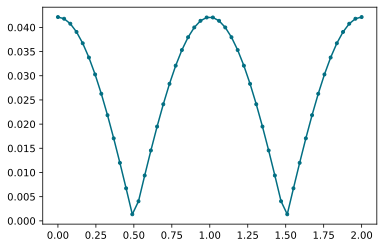

In [232]:
plt.plot(ph_list/np.pi,scan,'.-')

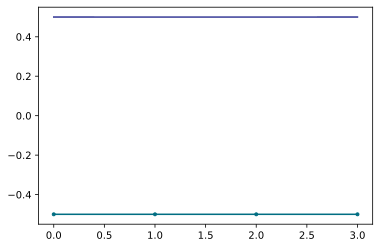

In [177]:
plt.plot(np.array(scannorm.T[0],'.-');
plt.plot(np.array(scan).T[1]);

In [105]:
scan

[array([ 0.68762042, -0.68762042]),
 array([ 0.92450359, -0.92450359]),
 array([-0.84071936,  0.84071936]),
 array([ 0.60828645, -0.60828645]),
 array([-0.37843378,  0.37843378]),
 array([-0.15145167,  0.15145167]),
 array([ 0.07235392, -0.07235392]),
 array([-0.29258163,  0.29258163]),
 array([-0.50883545,  0.50883545]),
 array([-0.72062173,  0.72062173]),
 array([ 0.92731338, -0.92731338]),
 array([ 0.87131501, -0.87131501]),
 array([ 0.67656879, -0.67656879]),
 array([ 0.48897678, -0.48897678]),
 array([-0.30953363,  0.30953363]),
 array([-0.13941327,  0.13941327]),
 array([-0.0230943,  0.0230943]),
 array([ 0.16931904, -0.16931904]),
 array([-0.30413245,  0.30413245]),
 array([-0.42420463,  0.42420463]),
 array([ 0.52781295, -0.52781295]),
 array([-0.61327782,  0.61327782]),
 array([ 0.67902528, -0.67902528]),
 array([ 0.72370708, -0.72370708]),
 array([-0.74631511,  0.74631511]),
 array([ 0.74631511, -0.74631511]),
 array([ 0.72370708, -0.72370708]),
 array([ 0.67902528, -0.679025

(-0.5, 0.5)

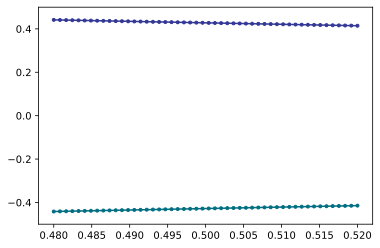

In [69]:
plt.plot(ph_list,scan.T[0]/omega,'.-');
plt.plot(ph_list,scan.T[1]/omega,'.-');
plt.ylim([-0.5,0.5])

  0%|          | 0/10 [00:00<?, ?it/s]

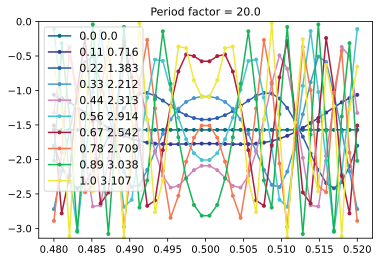

In [5]:
reload(qf)

ph_list = np.linspace(0.48,0.52,40)

dt_list = np.linspace(0.001,1,10)

err = []
for dt in tqdm(dt_list):
    scan = []
    T = 20*dt
    omega = 2*np.pi/T

    for ph in ph_list:
        evecs, evals = qf.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [np.pi/(2*dt),dt,T])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    # derr=np.sum(np.abs(np.diff(scan.T[0])))
    derr = T*np.abs(np.max(scan.T[0])\
                  -np.min(scan.T[0]))
    err.append(derr)
    plt.title('Period factor = '+str(np.round(T/dt,decimals = 2)))
    plt.plot(ph_list,T*scan.T[0],'.-',label = str(np.round(dt,decimals = 2))+' '+str(np.round(derr, decimals = 3)));
    # plt.plot(ph_list,scan.T[1],'.-',label = str(dt));
    plt.legend(loc="upper left")
    plt.ylim([-np.pi,0]);
plt.savefig('Fig_'+str(np.round(T/dt,decimals = 2))+'.pdf')

In [ ]:
scan.T[0]

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(ph_list,scan.T[0],'.-');
# plt.plot(ph_list,scan.T[1],'.-');
# plt.ylim([-5,5])

In [ ]:
reload(qop)

ph_list = np.linspace(0.48,0.52,40)

dt_list = np.linspace(0.001,1,10)

err = []
for dt in tqdm(dt_list):
    scan = []
    T = 20*dt
    omega = 2*np.pi/T

    for ph in ph_list:
        evecs, evals = qop.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [np.pi/(2*dt),dt,T])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    # derr=np.sum(np.abs(np.diff(scan.T[0])))
    derr = T*np.abs(np.max(scan.T[0])\
                  -np.min(scan.T[0]))
    err.append(derr)
    plt.title('Period factor = '+str(np.round(T/dt,decimals = 2)))
    plt.plot(ph_list,T*scan.T[0],'.-',label = str(np.round(dt,decimals = 2))+' '+str(np.round(derr, decimals = 3)));
    # plt.plot(ph_list,scan.T[1],'.-',label = str(dt));
    plt.legend(loc="upper left")
    plt.ylim([-np.pi,0]);
plt.savefig('Fig_'+str(np.round(T/dt,decimals = 2))+'.pdf')

In [ ]:
scan.T[0]

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(err,'.-')

In [ ]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-5,5])

In [ ]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-5,5])

In [ ]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
# plt.ylim([-np.pi/T,np.pi/T])

In [ ]:
np.pi/(2*1)

In [ ]:
plt.plot(err,'.-')

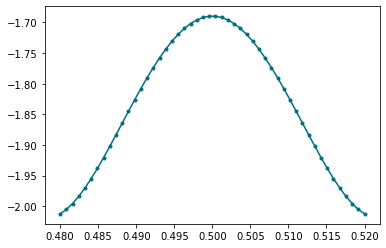

In [62]:
plt.plot(ph_list,scan.T[0],'.-');
# plt.plot(ph_list,scan.T[1],'.-');
# plt.ylim([-5,5])

  0%|          | 0/10 [00:00<?, ?it/s]

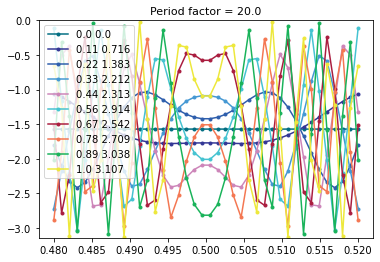

In [92]:
reload(qop)

ph_list = np.linspace(0.48,0.52,40)

dt_list = np.linspace(0.001,1,10)

err = []
for dt in tqdm(dt_list):
    scan = []
    T = 20*dt
    omega = 2*np.pi/T

    for ph in ph_list:
        evecs, evals = qop.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [np.pi/(2*dt),dt,T])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    # derr=np.sum(np.abs(np.diff(scan.T[0])))
    derr = T*np.abs(np.max(scan.T[0])\
                  -np.min(scan.T[0]))
    err.append(derr)
    plt.title('Period factor = '+str(np.round(T/dt,decimals = 2)))
    plt.plot(ph_list,T*scan.T[0],'.-',label = str(np.round(dt,decimals = 2))+' '+str(np.round(derr, decimals = 3)));
    # plt.plot(ph_list,scan.T[1],'.-',label = str(dt));
    plt.legend(loc="upper left")
    plt.ylim([-np.pi,0]);
plt.savefig('Fig_'+str(np.round(T/dt,decimals = 2))+'.pdf')

In [72]:
scan.T[0]

array([-6.41290338, -6.34728904, -6.2883802 , -6.23637534, -6.19145135,
       -6.15376443, -6.12344851, -6.10061332, -6.08534265, -6.07769983,
       -6.0777006 , -6.08534265, -6.10061324, -6.12344828, -6.15376397,
       -6.19145067, -6.23637453, -6.28837956, -6.34728937, -6.41290689])

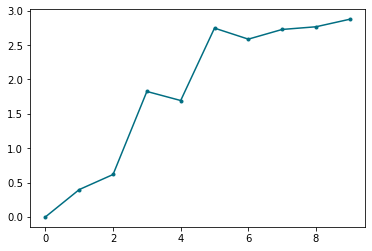

In [88]:
plt.plot(err,'.-')

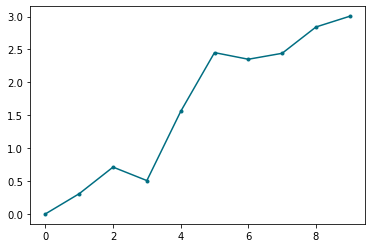

In [86]:
plt.plot(err,'.-')

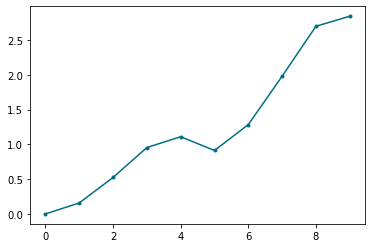

In [90]:
plt.plot(err,'.-')

(-5.0, 5.0)

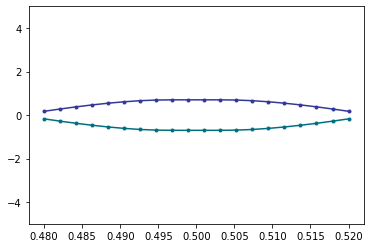

In [15]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-5,5])

(-5.0, 5.0)

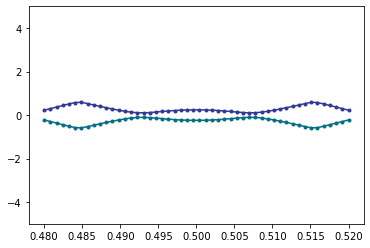

In [18]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-5,5])

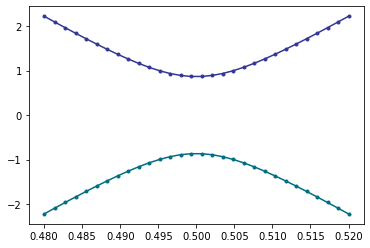

In [518]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
# plt.ylim([-np.pi/T,np.pi/T])

In [516]:
np.pi/(2*1)

1.5707963267948966

(-0.15393804002589986, 0.15393804002589986)

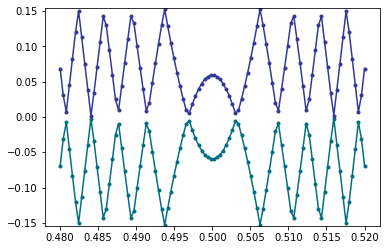

In [295]:
plt.plot(ph_list,scan.T[0],'.-');
plt.plot(ph_list,scan.T[1],'.-');
plt.ylim([-np.pi/T,np.pi/T])

## Deviation from flatness: amplitude vs width

In [164]:
reload(qop)

T = 2*1/(0.49)
omega = 2*np.pi/T

ph_list = np.linspace(0.48,0.52,20)
amp_list = np.linspace(0,1.01*np.pi,20)
dt_list = np.linspace(0.015,0.1,20)

err = []
for amp in tqdm(amp_list):
    err_temp = []
    for dt in dt_list:
        scan = []
        for ph in ph_list:
            evecs, evals = qop.FloquetSpectrum('fluxonium',q_prms = [150,ph],d_prms = [amp,dt,T])
            scan.append(np.sort(evals))
        scan = np.array(scan)
        err_temp.append(np.sum(np.abs(np.diff(scan.T[0]))))
    err.append(err_temp)

  0%|          | 0/20 [00:00<?, ?it/s]

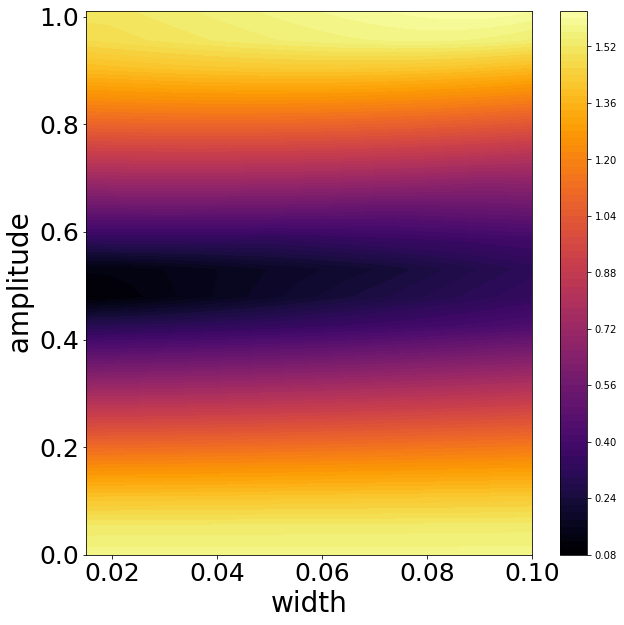

In [165]:
import matplotlib.lines as lines
fig, ax = plt.subplots(figsize=(10,10))

X, Y = np.meshgrid(dt_list,amp_list/np.pi)
cont0 = ax.contourf(X,Y ,err, 100,cmap = "inferno")


ax.set_ylabel(r" amplitude ",size = 28)

ax.set_xlabel(r'width',size = 28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)


fig.colorbar(cont0, ax=ax, format = "%.2f")
# fig.tight_layout()

## Deviation from flatness: width vs period

In [206]:
## Deviation from flatness: amplitude vs width
reload(qop)



ph_list = np.linspace(0.48, 0.52, 10)
T_list = np.linspace(0.1, 20, 30)
dt_list = np.linspace(0.015, 0.1, 10)

err = []
Amplitude = 1 #GHz
for Tmp in tqdm(T_list):
    err_temp = []
    for dt in dt_list:
        scan = []
        for ph in ph_list:
            evecs, evals = qop.FloquetSpectrum('fluxonium', q_prms=[150, ph], d_prms=[Amplitude, dt, Tmp])
            scan.append(np.sort(evals))
        scan = np.array(scan)
        T = Tmp
        omega = 2 * np.pi / T
        err_temp.append(np.sum(np.abs(np.diff(scan.T[0]))) / omega)
    err.append(err_temp)


  0%|          | 0/30 [00:00<?, ?it/s]

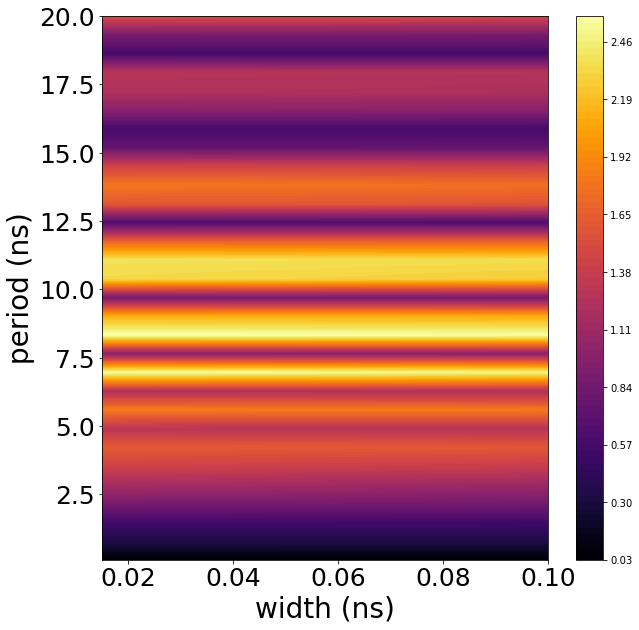

In [207]:

fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(dt_list, T_list)
cont0 = ax.contourf(X, Y, err, 100, cmap="inferno")

ax.set_ylabel(r" period (ns) ", size=28)

ax.set_xlabel(r'width (ns)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")
# fig.tight_layout()

## Deviation from flatness: amplitude vs period

In [331]:
## Deviation from flatness: amplitude vs width
reload(qop)
dt_aux = 0.1 #ns
ph_list = np.linspace(0.48, 0.52, 10)
amp_list = np.linspace(0,20,20)
T_list = np.linspace(10*dt, 20, 100) #Period should be greater than pulse width
options = qt.Options()
options.nsteps = 100000
err = []

err_temp = []
for Tmp in tqdm(T_list):

    scan = []
    for ph in ph_list:
        evecs, evals = qop.FloquetSpectrum('fluxonium', q_prms=[150, ph], d_prms=[0, dt_aux, Tmp])
        scan.append(np.sort(evals))
    scan = np.array(scan)
    T = Tmp
    omega = 2 * np.pi / T
    # plt.plot(scan)
    # err_temp.append(np.mean(np.abs(np.diff(scan.T[0])))/np.mean(np.diff(ph_list)))
    e1 = np.abs(np.max(scan.T[0])-np.min(scan.T[0]))
    e2 = np.abs(np.max(scan.T[0])-np.min(scan.T[0]))
    err_temp.append()

  0%|          | 0/100 [00:00<?, ?it/s]

(0.0, 1.5)

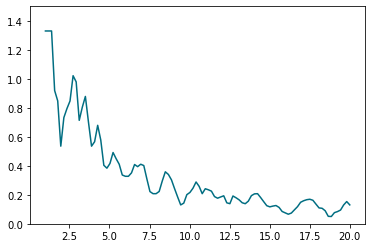

In [335]:
plt.plot(T_list,err_temp)
plt.ylim([0,1.5])

In [509]:
## Deviation from flatness: amplitude vs width
reload(qop)
dt_aux = 0.5 #ns
ph_list = np.linspace(0.48, 0.52, 70)
amp_list = np.linspace(0.5*np.pi/(2*dt_aux),2*np.pi/(2*dt_aux),10)
T_list = np.linspace(0.01*dt_aux, 20*dt_aux, 10) #Period should be greater than pulse width
options = qt.Options()
options.nsteps = 10000000
err = []

for Tmp in tqdm(T_list):
    err_temp = []
    for Amp in amp_list:
        scan = []
        for ph in ph_list:
            evecs, evals = qop.FloquetSpectrum('fluxonium', q_prms=[150, ph], d_prms=[Amp, dt_aux, Tmp])
            scan.append(np.sort(evals))
        scan = np.array(scan)
        T = Tmp
        omega = 2 * np.pi / T
        err_temp.append(np.mean(np.abs(np.diff(scan.T[0])))/np.mean(np.diff(ph_list)))
    err.append(err_temp)

  0%|          | 0/10 [00:00<?, ?it/s]

In [461]:
np.pi/(2*dt_aux)

3.141592653589793

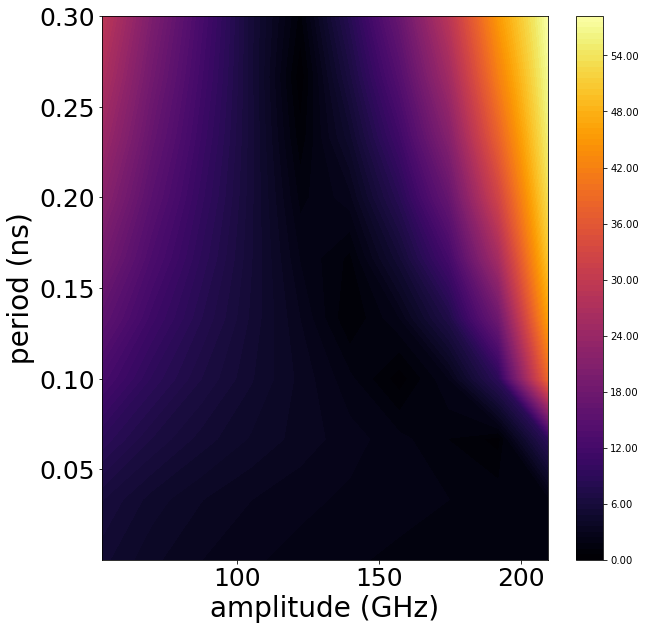

In [507]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" period (ns) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

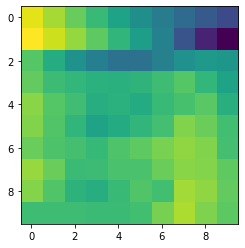

In [511]:
plt.imshow(err)

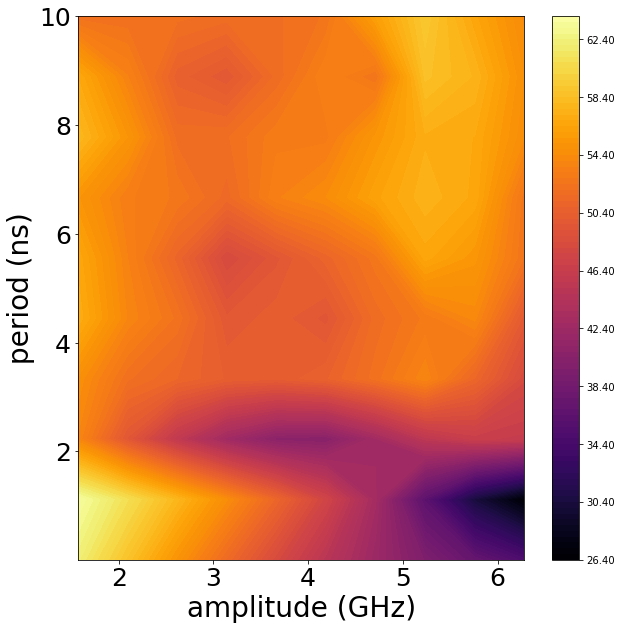

In [510]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" period (ns) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

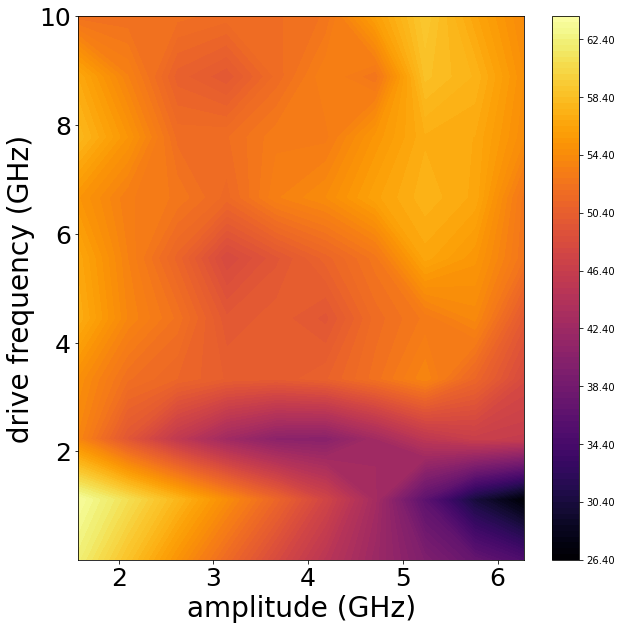

In [504]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" drive frequency (GHz) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

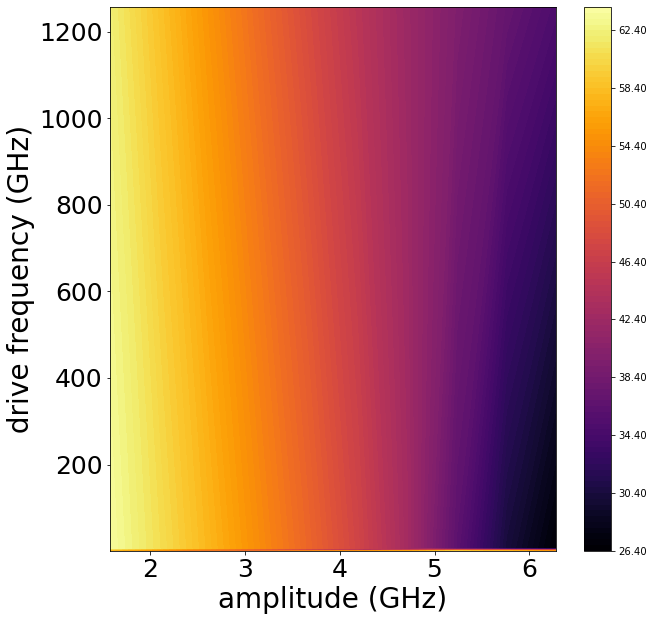

In [505]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, 2*np.pi/T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" drive frequency (GHz) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

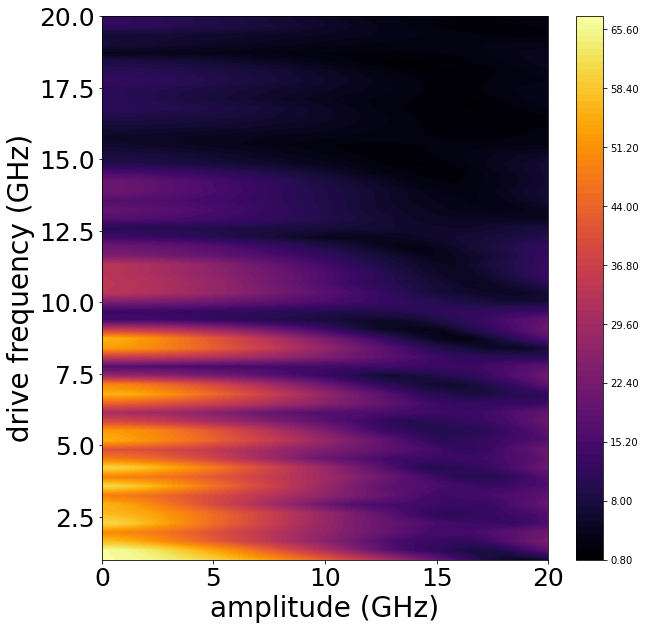

In [302]:
from matplotlib import ticker, cm
fig, ax = plt.subplots(figsize=(10, 10))

X, Y = np.meshgrid(amp_list, T_list)
cont0 = ax.contourf(X, Y, err, 100,
                    cmap
                    ="inferno")

ax.set_ylabel(r" drive frequency (GHz) ", size=28)

ax.set_xlabel(r'amplitude (GHz)', size=28)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

fig.colorbar(cont0, ax=ax, format="%.2f")


# fig.tight_layout()

TypeError: Invalid shape (0,) for image data

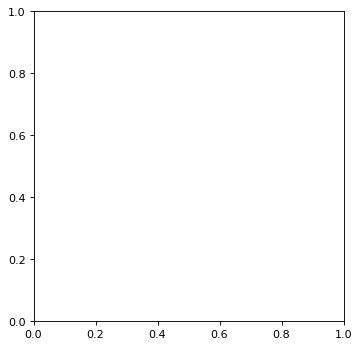

In [336]:
from matplotlib.pyplot import figure

figure(figsize=(5, 20), dpi=80)
plt.imshow(err)

In [ ]:
zz